<a href="https://colab.research.google.com/github/mrajibrm/HTR-Handwritten-Txt-Reecognition-Using-CNN/blob/master/MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load The MNIST Dataset from Google tensorflow package.
##Here we have used MNIST handwritten digit dataset

In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Preparing for grayscale visualization

8


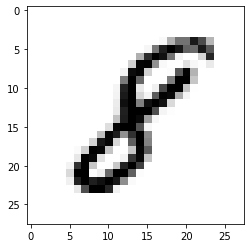

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
# use this if using iPython
image_index = 7777
# select anything up to 60,000
print(y_train[image_index])
# The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# Before channeling to Convo-2D network printing the dataset size
## IT has 60000 images and image size is 28 X 28

In [6]:
x_train.shape

(60000, 28, 28)

# Reshaping and Normalizing the Images

we need 4-dims numpy arrays. However, as we see above, our array is 3-dims. In addition, we must normalize our data as it is always required in neural network models. We can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code).

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


# Building the Convolutional Neural Network
import the Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. we use Convo2D, maxpolling etc.

In [8]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


# Compiling and Fitting the Model

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 22s 370us/step - loss: 0.2179 - acc: 0.9338
Epoch 2/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0885 - acc: 0.9728
Epoch 3/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0610 - acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0463 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0376 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0302 - acc: 0.9896
Epoch 7/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0272 - acc: 0.9906
Epoch 8/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0219 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.0177 

# Evaluating the Model

In [10]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 64us/step


[0.05639573532693321, 0.9854]

7


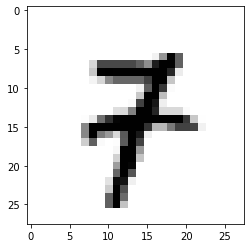

In [18]:
image_index = 4423
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())